In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading data

In [2]:
df = pd.read_csv(r"C:\Users\hp\Downloads\1111\Allot\wooden\cleaned_monthly_wooden_data.csv", parse_dates=['date'])
df = df.set_index('date')
df

quantity
date                
2019-11-01     69342
2019-12-01    116044
2020-01-01    131149
2020-02-01    122010
2020-03-01    113593
2020-04-01    109791
2020-05-01     65443
2020-06-01    106328
2020-07-01     89661
2020-08-01    132232
2020-09-01    161498
2020-10-01    136698
2020-11-01    118348
2020-12-01    165051
2021-01-01    180156
2021-02-01    171017
2021-03-01    162600
2021-04-01    158797
2021-05-01    114449
2021-06-01    155335
2021-07-01    138668
2021-08-01    181238
2021-09-01    210505
2021-10-01    185704
2021-11-01    167355
2021-12-01    214057
2022-01-01    229162
2022-02-01    220023
2022-03-01    211606
2022-04-01    207804
2022-05-01    163456
2022-06-01    204342
2022-07-01    187674
2022-08-01    230245
2022-09-01    259512
2022-10-01    234711
2022-11-01    216362

In [3]:
df = df.rename({'quantity': 'count'}, axis = 1)
df

count
date              
2019-11-01   69342
2019-12-01  116044
2020-01-01  131149
2020-02-01  122010
2020-03-01  113593
2020-04-01  109791
2020-05-01   65443
2020-06-01  106328
2020-07-01   89661
2020-08-01  132232
2020-09-01  161498
2020-10-01  136698
2020-11-01  118348
2020-12-01  165051
2021-01-01  180156
2021-02-01  171017
2021-03-01  162600
2021-04-01  158797
2021-05-01  114449
2021-06-01  155335
2021-07-01  138668
2021-08-01  181238
2021-09-01  210505
2021-10-01  185704
2021-11-01  167355
2021-12-01  214057
2022-01-01  229162
2022-02-01  220023
2022-03-01  211606
2022-04-01  207804
2022-05-01  163456
2022-06-01  204342
2022-07-01  187674
2022-08-01  230245
2022-09-01  259512
2022-10-01  234711
2022-11-01  216362

In [4]:
train=df.head(24)
test=df.tail(12)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [6]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [7]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [8]:
# define generator
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [9]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.02687816 0.34882326 0.45295115 0.3899505  0.33192704 0.30571756
 0.         0.281845   0.1669493  0.46041693 0.66216514 0.49120376]
Predict this y: 
 [[0.36470613]]


In [10]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [12]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(generator,epochs=50)

Epoch 1/50
12/12 [==============================] - 2s 4ms/step - loss: 0.2631
Epoch 2/50
12/12 [==============================] - 0s 5ms/step - loss: 0.0652
Epoch 3/50
12/12 [==============================] - 0s 6ms/step - loss: 0.0325
Epoch 4/50
12/12 [==============================] - 0s 5ms/step - loss: 0.0407
Epoch 5/50
12/12 [==============================] - 0s 5ms/step - loss: 0.0318
Epoch 6/50
12/12 [==============================] - 0s 4ms/step - loss: 0.0326
Epoch 7/50
12/12 [==============================] - 0s 7ms/step - loss: 0.0359
Epoch 8/50
12/12 [==============================] - 0s 4ms/step - loss: 0.0267
Epoch 9/50
12/12 [==============================] - 0s 15ms/step - loss: 0.0404
Epoch 10/50
12/12 [==============================] - 0s 13ms/step - loss: 0.0458
Epoch 11/50
12/12 [==============================] - 0s 7ms/step - loss: 0.0363
Epoch 12/50
12/12 [==============================] - 0s 7ms/step - loss: 0.0317
Epoch 13/50
12/12 [============================

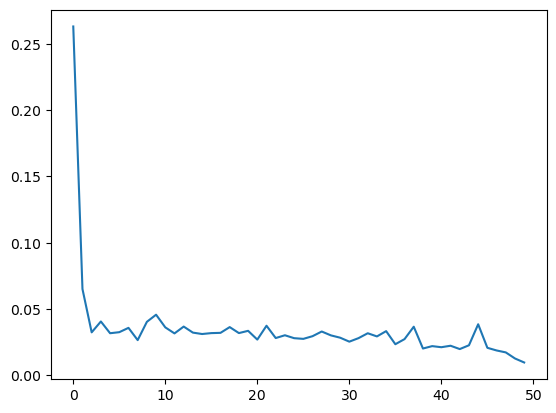

In [15]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [16]:
last_train_batch = scaled_train[-12:]

In [17]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [18]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 206ms/step


array([[0.91961104]], dtype=float32)

In [19]:
scaled_test[0]

array([1.02448608])

In [20]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 22ms/step


In [21]:
test_predictions

[array([0.91961104], dtype=float32),
 array([1.1352028], dtype=float32),
 array([1.1656673], dtype=float32),
 array([1.1028109], dtype=float32),
 array([1.0542711], dtype=float32),
 array([0.96166956], dtype=float32),
 array([0.8863507], dtype=float32),
 array([1.0332768], dtype=float32),
 array([1.2310152], dtype=float32),
 array([1.5438508], dtype=float32),
 array([1.5975637], dtype=float32),
 array([1.6758024], dtype=float32)]

In [22]:
test.head()

count
date              
2021-12-01  214057
2022-01-01  229162
2022-02-01  220023
2022-03-01  211606
2022-04-01  207804

In [23]:
true_predictions = scaler.inverse_transform(test_predictions)

In [24]:
test['Predictions'] = true_predictions

C:\Users\hp\AppData\Local\Temp\ipykernel_7552\4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<AxesSubplot:xlabel='date'>

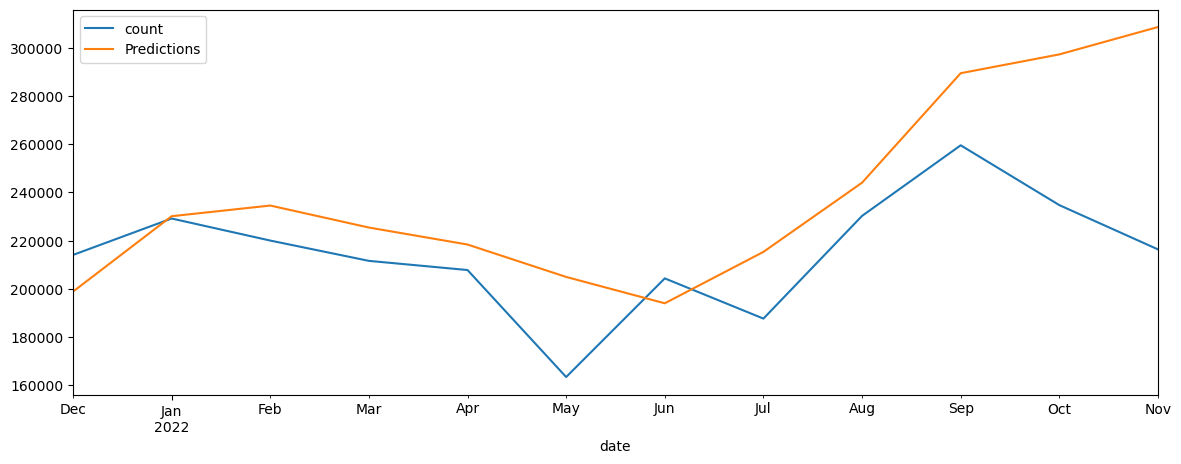

In [25]:
test.plot(figsize=(14,5))   

In [26]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['count'],test['Predictions']))
print(rmse)

37440.15451779719
